# Applied Survival Analysis Using R 
### Book by Dirk F. Moore

## Chapter 1 Introduction

* Note : This note book is created with R in Jupyter Notebook.
* Note : I made this note book y coping graphs of the book while studying the book. Addtinal R code is added if necessary.  For detail explanation, read the book. 

In [28]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

### Example 1.2. Xelox in patients with advanced gastric cancer

In [29]:
install.packages('asaur')

Warning message:
"package 'asaur' is in use and will not be installed"


In [30]:
library (asaur)

In [31]:
Tis is a Phaase II clinical trial of Xeloda and oxaliplatin (XELOX) chemotherapy given before surgery to 48 advanced gastric 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Tis is
        ^


In [32]:
gastricXelox[23:27,]

,timeWeeks,delta
,<int>,<int>
23,42,1
24,43,1
25,43,0
26,46,1
27,48,0


* timeWeeks: a list of survival times, rounded to the nearest week
* delta : censoiring indicator (1 : progression or death)

### Example 1.3 Pacreatic cancer in patients with locally advanced or metastatic disease

In [33]:
head(pancreatic)

,stage,onstudy,progression,death
,<fct>,<fct>,<fct>,<fct>
1,M,12/16/2005,2/2/2006,10/19/2006
2,M,1/6/2006,2/26/2006,4/19/2006
3,LA,2/3/2006,8/2/2006,1/19/2007
4,M,3/30/2006,.,5/11/2006
5,LA,4/27/2006,3/11/2007,5/29/2007
6,M,5/7/2006,6/25/2006,10/11/2006


__Patient3__
* A patient with locally advanced disease (stage="LA")
* entered the study on February 3, 2006
* had progressive disease on Aug 2 of that year
* died on January 19 of the following year
* The progression-free survival for tha patient is "onstudy - stage" date

__Patient4__
* This patients with metastatic disease (stage="M")
* died on May 11 of of that year (with no recorded data of progression)
* The progression-free survival for tha patient is "death- stage" date

__For both patients, the overall survival = death - stage date__

### Example 1.4. Survival prospects of prostate cancer patients with high-risk disease

There are two outcomes of interest in this data.
* death from prostata cancer and
* death from other causes. 

We have competing risks survival analysis problem.

In [34]:
prostateSurvival[88:95,]

,grade,stage,ageGroup,survTime,status
,<fct>,<fct>,<fct>,<int>,<int>
88,poor,T2,75-79,33,0
89,mode,T2,75-79,6,0
90,mode,T1c,75-79,15,2
91,mode,T2,70-74,6,2
92,mode,T1ab,80+,93,1
93,poor,T2,80+,60,2
94,mode,T2,80+,1,0
95,mode,T1ab,75-79,34,0


Fir each patient we have 

* grade: poorly or moderately differentiated
* stage: cancer stage, __T1c__ if screen-diagnosed using a prostate-specific antigen blood test, __T1ab__ if clinically diagnosed without screening, __T2__ if palpable at diagnosis
* ageGroup: 66-70, 71-75, 76-80, and 80+
* survTime: days from diagnosis to death or date last seen
* status: __1__:an indicator for weather the patient died or prostate cancer, __2__:died of some other case, __0__: was still alive at the date last seen

The simulated date set mathces the original in the number of patients in $2(grade)\times3(stage)\times4(ageGraoup)=24$ categories 

### Example 1.5. Comparison of medical therapies to aid smokers to quit

The purpose of this study as to evaluate extended duration of a triple-medication combination versus therapy with the nicotine patch alone in smokers with medical illnesses. Patients were randomly assigned to the triple-combination or patch therapy and followed for up to 6 months.

In [35]:
names(pharmacoSmoking)

[1] "id"             "ttr"            "relapse"        "grp"           
 [5] "age"            "gender"         "race"           "employment"    
 [9] "yearsSmoking"   "levelSmoking"   "ageGroup2"      "ageGroup4"     
[13] "priorAttempts"  "longestNoSmoke"

Here is a listing of a few cases and variables

In [36]:
pharmacoSmoking[1:6, 2:8]

,ttr,relapse,grp,age,gender,race,employment
,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,182,0,patchOnly,36,Male,white,ft
2,14,1,patchOnly,41,Male,white,other
3,5,1,combination,25,Female,white,other
4,16,1,combination,54,Male,white,ft
5,0,1,combination,45,Male,white,other
6,182,0,combination,43,Male,hispanic,ft


* trr : the number of days without smoking ("time to relapse")
* relapse: __1__ indicates that the subject started smoking agina at the given time
* grp: treatment indicator
* employment: __ft__ : full time, __pt__: part time, __other__

### Example 1.6. Prediction of survival of hepatocellular carcinoma patients using biomakers

This study focused on using expression of a chemokind known as CXCL17, and other clinical and biomaker factors, to predict overall and recurrence-free survival.

In [37]:
names(hepatoCellular)

[1] "Number"               "Age"                  "Gender"              
 [4] "HBsAg"                "Cirrhosis"            "ALT"                 
 [7] "AST"                  "AFP"                  "Tumorsize"           
[10] "Tumordifferentiation" "Vascularinvasion"     "Tumormultiplicity"   
[13] "Capsulation"          "TNM"                  "BCLC"                
[16] "OS"                   "Death"                "RFS"                 
[19] "Recurrence"           "CXCL17T"              "CXCL17P"             
[22] "CXCL17N"              "CD4T"                 "CD4N"                
[25] "CD8T"                 "CD8N"                 "CD20T"               
[28] "CD20N"                "CD57T"                "CD57N"               
[31] "CD15T"                "CD15N"                "CD68T"               
[34] "CD68N"                "CD4NR"                "CD8NR"               
[37] "CD20NR"               "CD57NR"               "CD15NR"              
[40] "CD68NR"               "CD4TR"                "CD8TR"               
[43] "CD20TR"               "CD57TR"               "CD15TR"              
[46] "CD68TR"               "Ki67"                 "CD34"

In [38]:
hepatoCellular[c(1,2,3,65,71), c(2,3,16:20, 24, 27)]

,Age,Gender,OS,Death,RFS,Recurrence,CXCL17T,CD4N,CD20T
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,57,0,83,0,13,1,113.94724,0,20.950000
2,58,1,81,0,81,0,54.07154,NA,NA
3,65,1,79,0,79,0,22.18883,NA,NA
65,38,1,5,1,5,1,106.78169,0,11.450000
71,57,1,11,1,11,1,98.49680,0,2.437093


* OS: overall survival, outcome variable
* RFS: recurrence-free-survival
* The corresponding censoring indicators are "Death" and "Recurrence"

## Chapter2 Basic Principles of Survival Analysis

In [39]:
library(survival)

<font size="3"> __Fig. 2.2__ Hazard and survival functions for US males and females in 2004. The hazard function is plotted on a log scale </font>

In [40]:
tm <- c(0, # birth
        1/365, # first day of life 
        7/365, # senventh day of life
        28/365,# fourth week of life
        1:110) #subsequent years

In [41]:
hazMale <- survexp.us[, "male", "2004"]
hazFemale <- survexp.us[,"female", "2004"]

In [42]:
# a graph will be added 

## 2.4 Parametric Survival distribution

<font size="3"> __Fig. 2.4__ Weibull hazard function </font>

The Weibull distribution offers more flexibility in modeling survival data than the exponential distibution. 

* The hazard function is $h(t) = \alpha\lambda(\lambda t)^{\alpha -1} = \alpha\lambda^{\alpha}t^{\alpha-1}$.
* The cumulative hazard function is $H(t) = (\lambda t)^{\alpha}$
* The survival function is $S(t)=e^{-({\lambda t})^{\alpha}}$

The exponential distribution is a special case with $\alpha = 1$
* $\alpha >1$ : monotone increasing
* $\alpha <1$ : monotone decreasing
 


In R, the function "dweibull" is p.d.f and "pweibull" is c.d.f repectively of the Weibull distribution. This function use arguments "shape" for $\alpha$ and "scale" for $1/\lambda$. To obtain the survivial funcion, we can speficy "lower.tail=F" as an option in the "pweibull" function.

__Survival Function__

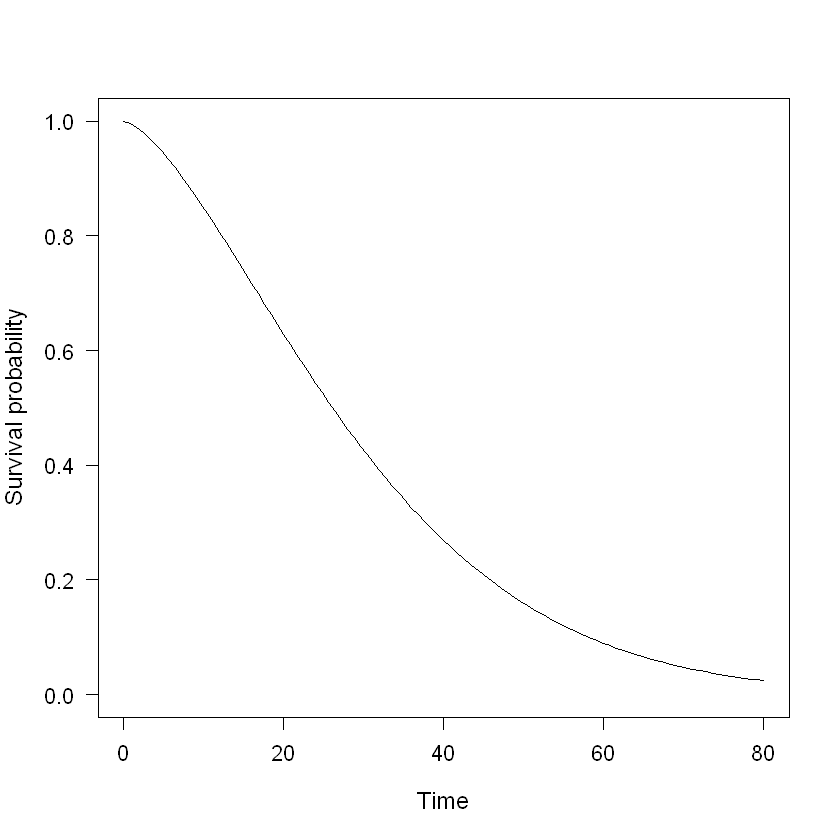

In [43]:
weibSurv <- function(t, shape, scale) pweibull(t, shape=shape, scale=scale, lower.tail=F)
curve(weibSurv(x, shape=1.5, scale=1/0.03), from=0, to=80, 
      ylim=c(0,1), ylab='Survival probability', xlab='Time', 
      las=1,cex.main=1.25, cex.lab=1.2, cex.axis=1.1)

# cex.main: Size of main title
# cex.lab: Size of axis labels (the text describing the axis)
# cex.axis: Size of axis text (the values that indicate the axis tick labels)

__Hazard function__ = p.d.f / survival function

In [44]:
weibHaz <- function(x, shape, scale) dweibull(x, shape=shape, scale=scale)/pweibull(x, shape=shape, scale=scale, lower.tail=F)

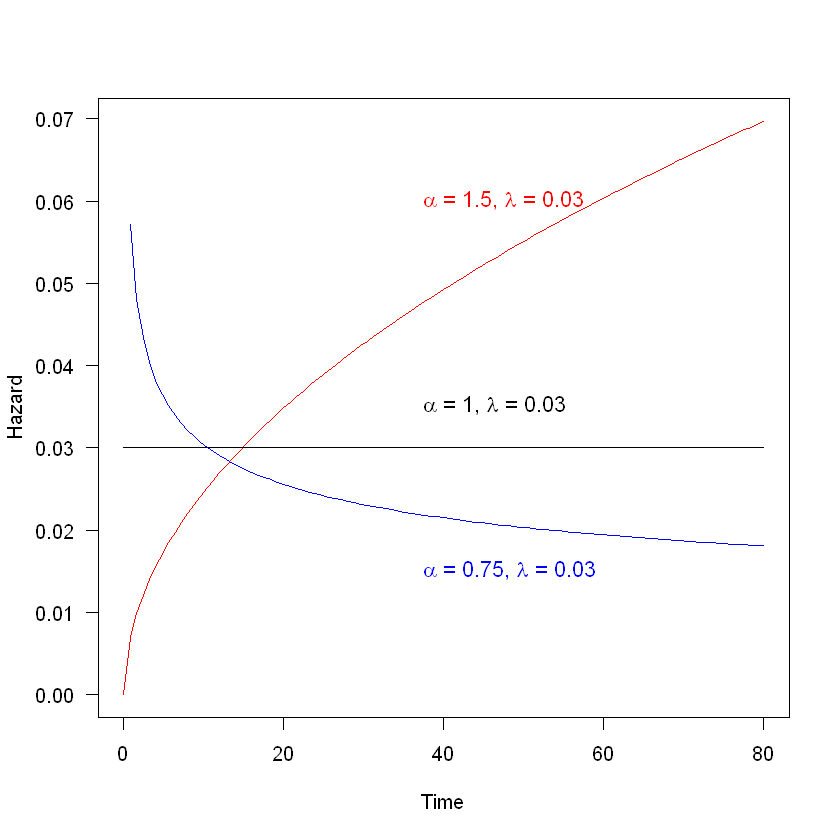

In [45]:
curve(weibHaz(x, shape=1.5, scale=1/0.03), from=0, to=80, ylab='Hazard', xlab='Time', col='red',las=1)

curve(weibHaz(x, shape=1, scale=1/0.03), from=0, to=80, ylab='Hazard', xlab='Time', col='black',las=1, add=T)

curve(weibHaz(x, shape=0.75, scale=1/0.03), from=0, to=80, ylab='Hazard', xlab='Time', col='blue',las=1, add=T)


text(x=36, y=c(0.06, 0.035,0.015), pos=4, 
     labels=c(expression(paste(alpha, " = 1.5, ", lambda," = 0.03")),
              expression(paste(alpha, " = 1, ", lambda," = 0.03")),
              expression(paste(alpha, " = 0.75, ", lambda," = 0.03"))
              ), col=c('red', 'black', 'blue'), cex=1.1)



### Generate Random variables from the exponential or Weibull distribution.

Generate 1000 Weibull random variables with shape 1.5 and scale 1/0.03, and compute their mean and median

In [46]:
set.seed(123) # to get same result since we generate a random variable.
tt.weib <- rweibull (1000, shape=1.5, scale=1/0.03)

In [47]:
mean(tt.weib)
median(tt.weib)

[1] 30.24802

[1] 26.61471

The theoretical mean and median is...

$E(T) = \frac {\Gamma (1 + 1/\alpha)} {\lambda} $ <br>
$t_{med} = \frac {[log(2)]^{1/\alpha}}{\lambda} $

In [48]:
gamma(1 + 1/1.5)/0.03 # mean

(log(2)^(1/1.5))/0.03 #median

[1] 30.09151

[1] 26.10733

<font size="3"> __Fig. 2.5__ Gamma hazard function </font>

The gamma distribution is also another choice for survival modeling. The probability density function is given by 

$$f(t) = \frac{\lambda^{\beta} t^{\beta -1} exp(-\lambda t)} {\Gamma(\beta)} $$

The hazard and survival function of the gamma distribution cannot be written in closed form, but they can be computing using the formula .

* $\beta > 1$ monotone increasing
* $\beta < 1$ monotone decreasing
* $\beta = 1$ Exponential distribution

In [49]:
gammaHaz <- {function(x, shape, scale) 
             dgamma(x, shape=shape, scale=scale)/pgamma(x, shape=shape, scale=scale, lower.tail=F)
            }

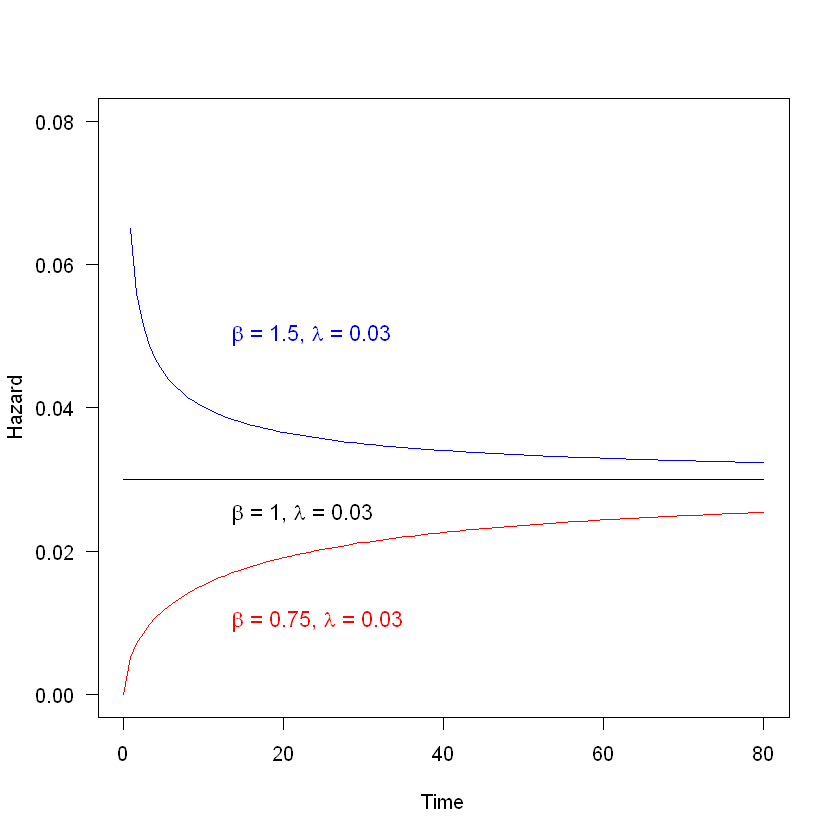

In [50]:
curve(gammaHaz(x, shape=1.5, scale=1/0.03), 
      from=0, to=80, ylim=c(0, 0.08), ylab='Hazard', xlab='Time', col='red',las=1)

curve(gammaHaz(x, shape=1, scale=1/0.03), 
      from=0, to=80, ylim=c (0, 0.08), ylab='Hazard', xlab='Time', col='black',las=1, add=T)

curve(gammaHaz(x, shape=0.75, scale=1/0.03), 
      from=0, to=80,ylim=c (0, 0.08), ylab='Hazard', xlab='Time', col='blue',las=1, add=T)


text(x=12, y=c(0.05, 0.025,0.01), pos=4, 
     labels=c(expression(paste(beta, " = 1.5, ", lambda," = 0.03")),
              expression(paste(beta, " = 1, ", lambda," = 0.03")),
              expression(paste(beta, " = 0.75, ", lambda," = 0.03"))
              ), col=c('blue', 'black', 'red'), cex=1.1)

## 2.5 Computing the Survival Function from the Hazard Function

<font size="3"> __Fig. 2.6__ Illustration of calculation of the cumulative hazard for males in 2004, <br> See Fig. 2.2 accordingly </font>

If we know the hazard function of a survival random variable, we may derive the survival funcion using
$$ S(t) = exp( -  \int_{0}^{t}h(u) \,du ) = exp(-H(t)) $$ 
where 
* $H(t)$ is the cumulataive hazard function.
* $h(t)$ is the hazard function

But if the hazard function is more complicated, we need to use numerical methods to evaluate the integral.

# Under construction :  will be updated 

In [51]:
# library(survival)

In [52]:
# # We copied the Fig.2.2 code here to illustrate caculation of the cumulative hazard.
# tm <- c(0, # birth
#         1/365, # first day of life 
#         7/365, # senventh day of life
#         28/365,# fourth week of life
#         1:107) #subsequent years

# # tm <- c(0:110)

In [53]:
# length(tm)

In [54]:
# length(hazMale)

In [55]:
# hazMale <- survexp.us[, "male", "2004"]
# hazFemale <- survexp.us[,"female", "2004"]

In [56]:
# tm.diff <- diff(tm)

In [57]:
# survMale <- exp(-cumsum(hazMale*tm.diff)*365.24)
# survFemale <- exp(-cumsum(hazFemale*tm.diff)*365.24)

In [58]:
# sum(survMale*tm.diff)
# sum(hazFemale*tm.diff)

In [59]:
# plot(survMale)

In [60]:
# ?survexp.us

In [61]:
# survexp.uswhite <- survexp.usr[,,"white",]

In [62]:
# survexp.uswhite

## 2.6 A Brief Introduction to Maximum Likelihood Estimation

Suppose we have a series of obervations $t_1, t_2, ..., t_n$ from an exponential distribution with unknown parameter $\lambda$. How can we estimate $\lambda$? We can derive the MLE of the exponential distribution. Alternatevely, we may use substitute a hazard factor $\lambda$ for the censored observations and a survival factor $e^{-\lambda t_i}$ for all obervations. This leads to the same form for the likelihood funtion. 

* d : total number of death
* V : total amount of time of patients on the study (person-years in epidemiology)
* log-likelihood $l(\lambda) = d log \lambda - \lambda V $
* MLE : $\hat \lambda = \frac{d}{V} $
* Note: Second derivative is negative.


<font size="3"> __Fig. 2.7__ Log-likelihood function for data from Table1.1, showing the maximum likelihood estimates, and the horizontal tangent at the maximum. </font>

In [67]:
# Table 1.1

Patient <- seq(1,6,by=1)
Survtime <- c(7, 6, 6, 5, 2, 4)
Status <- c(0, 1, 0, 0, 1, 1)

Supposed the table 1.1 are derived from an exponential distribution with unknown parameter $\lambda$. 

* There are three death, d=3. 
* The total patient time on study is V=7+6+6+5+2+4= 30

In [64]:
d <- sum(Status)
V <- sum(Survtime)
lambda_hat <- d/V
lambda <- seq(0.001, 0.3, by=0.01) # to draw abline

d
V
lambda_hat

[1] 3

[1] 30

[1] 0.1

In [65]:
MLE <- {function(x) d*log(x) - x*V} # x is a lambda in the MLE function

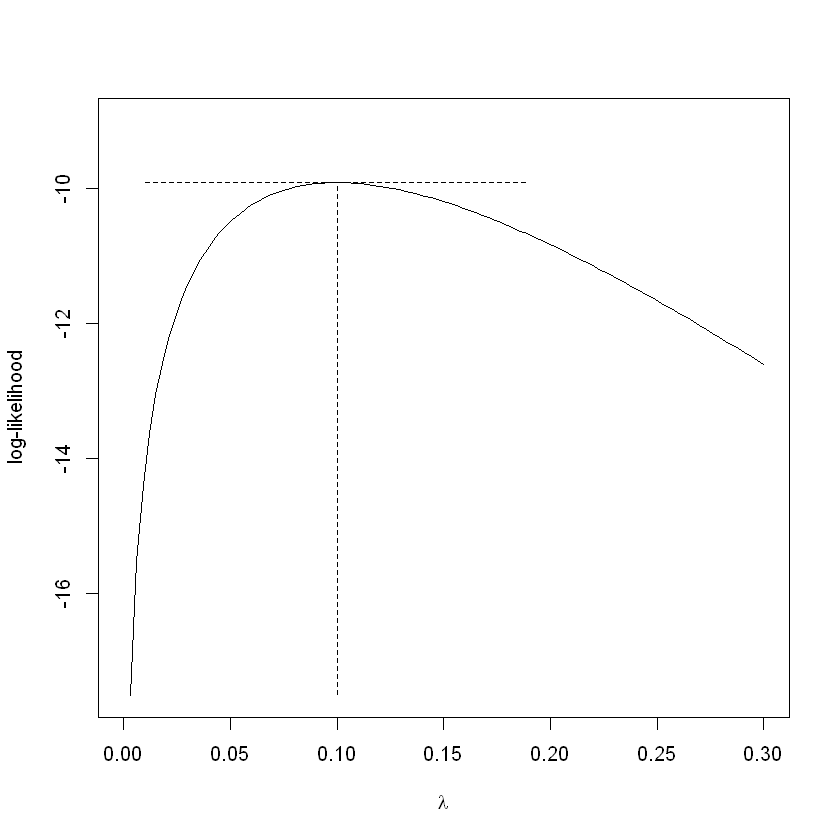

In [66]:
curve(MLE(x), from=0, to=0.3, ylab='log-likelihood', xlab= expression(lambda), ylim=c(-17.5, -9))

#abline segment
segments(x0=0.01, y0= max(MLE(lambda)), x1=0.19, y1=max(MLE(lambda)), lty=2)
segments(x0=0.1, y0= -17.5, x1=0.1, y1=MLE(0.1), lty=2)